<a href="https://colab.research.google.com/github/aaa0034213/2024-1-my-BDA/blob/main/inclass/09w_0430_tue_B_diamonds_data_vis_ch12_plotly_ch13_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 빅데이터분석 프로그래밍
09주차 B반, 2024-04-30

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.9 MB/s eta 0:00:00


In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

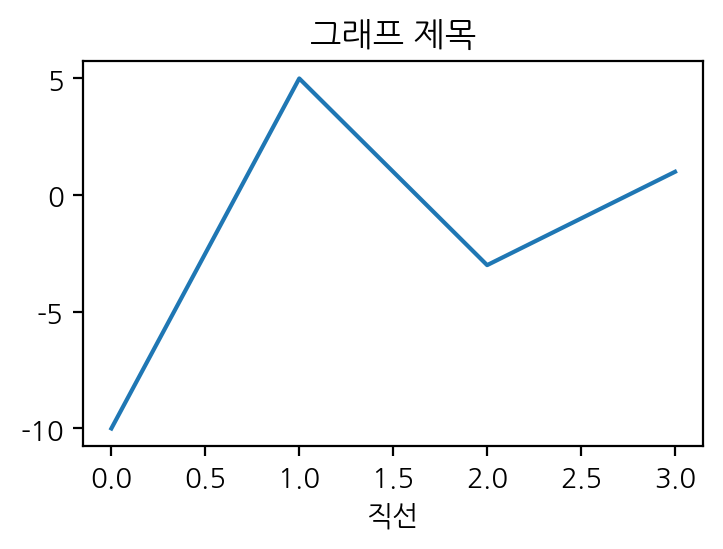

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 2), reused 8 (delta 1), pack-reused 0
Receiving objects: 100% (35/35), 4.58 MiB | 6.32 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Error downloading object: EMD_Seoul.geojson (cd4638a): Smudge error: Error downloading EMD_Seoul.geojson (cd4638a1708cd829df39b97701009f6355bb642b95091fabd49dd6c740d2b5d6): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/data/.git/lfs/logs/20240430T051945.384189929.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: EMD_Seoul.geojson: smudge filter lfs failed
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'



## 데이터프레임 가로로 여러 개 출력하기

In [ ]:
exam = pd.read_csv('data/exam.csv')
exam.info()

In [9]:
from IPython.display import display_html
def display_sbs(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)  # 시험범위 x 눈으로 확인

In [12]:
display_sbs(exam, exam[['id', 'math', 'english']])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


## seaborn의 대표적 토이 데이터셋, 다이아몬드 데이터셋


In [ ]:
diamonds = sns.load_dataset("diamonds")
diamonds.info()

In [14]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

| 번호 | 변수(열) | 설명 | 종류 | 값 |
|------|----------|------|------|----|
| 1 | carat | 다이아몬드의 무게(캐럿) | 수치(num) | 0.2 ~ 5.01 |
| 2	| cut	| 다이아몬드 컷(자름)의 품질 | 	범주(순서) | Fair(보통), Good(좋음), Very Good(매우 좋음), Premium(프리미엄), Ideal(이상적) |
| 3	| color | 다이아몬드 색상 | 범주(순서) | D(고품질), E, F, G, H, I, J(저품질) |
| 4| clarity| 다이아몬드의 투명도 | 범주(순서) | I(저품질), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(고품질)
| 5| depth| 총 깊이|  백분율| 	수치(num)| 	43 ~ 79|
| 6| table| 가장 넓은 지점에 대한 다이아몬드 상단의 너비| 수치(num)| 43 ~ 95|
| 7| price| 	가격(미국 달러) | 	수치(num)| 	\$326 ~ $18,823: 정수|
| 8	| x	| 길이(mm)| 	수치(num) | 0 ~ 10.74|
| 9	| y	| 폭(mm)| 	수치(num) | 0 ~ 58.9|
| 10| 	z | 	깊이(mm)| 	수치(num)| 	0 ~ 31.8|


In [16]:
diamonds.shape

(53940, 10)

In [17]:
diamonds.rename(columns={'table':'dtab'},inplace = True)
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'dtab', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [18]:
display_sbs(diamonds[['carat', 'price']].head(), diamonds[['carat', 'price']].tail(), diamonds[['carat', 'price']].sort_values('price', ascending=False).head())

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
,carat,price
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [ ]:
type(diamonds.cut)

In [20]:
diamonds.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [24]:
diamonds.head()

,carat,cut,color,clarity,depth,dtab,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [25]:
print(diamonds.cut.cat.categories)
print(diamonds.color.cat.categories)
print(diamonds.clarity.cat.categories)

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')
Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')
Index(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], dtype='object')


In [27]:
diamonds.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [28]:
diamonds.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [ ]:
diamonds.isna().sum()

In [30]:
# 중간고사: dropna()
diamonds.dropna()

,carat,cut,color,clarity,depth,dtab,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [31]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [32]:
display_sbs(df, df.dropna())

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
msno.matrix(diamonds);

In [ ]:
msno.bar(diamonds)

In [35]:
display_sbs(diamonds[['price', 'carat']].head(), diamonds[['clarity', 'cut']].tail())

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31
,clarity,cut
53935,SI1,Ideal
53936,SI1,Good
53937,SI1,Very Good
53938,SI2,Premium


In [36]:
display_sbs(diamonds.loc[50:55, ['depth', 'price', 'x']], diamonds[50:55])

depth 
 price 
 x 
 
 
 
 
 50 
 60.9 
 404 
 4.02 
 
 
 51 
 61.9 
 404 
 3.93 
 
 
 52 
 60.9 
 404 
 4.45 
 
 
 53 
 61.6 
 404 
 3.93 
 
 
 54 
 59.3 
 404 
 3.91 
 
 
 55 
 61.0 
 405 
 4.30 
 
 
      
 
 
 
 carat 
 cut 
 color 
 clarity 
 depth 
 dtab 
 price 
 x 
 y 
 z 
 
 
 
 
 50 
 0.24 
 Very Good 
 F 
 SI1 
 60.9 
 61.0 
 404 
 4.02 
 4.03 
 2.45 
 
 
 51 
 0.23 
 Ideal 
 G 
 VS1 
 61.9 
 54.0 
 404 
 3.93 
 3.95 
 2.44 
 
 
 52 
 0.32 
 Ideal 
 I 
 SI1 
 60.9 
 55.0 
 404 
 4.45 
 4.48 
 2.72 
 
 
 53 
 0.22 
 Premium 
 E 
 VS2 
 61.6 
 58.0 
 404 
 3.93 
 3.89 
 2.41 
 
 
 54 
 0.22 
 Premium 
 D 
 VS2 
 59.3 
 62.0 
 404 
 3.91 
 3.88 
 2.31

In [37]:
display_sbs(diamonds.iloc[50:55, [2, 4, 5, 8]], diamonds.iloc[50:55, ])

color 
 depth 
 dtab 
 y 
 
 
 
 
 50 
 F 
 60.9 
 61.0 
 4.03 
 
 
 51 
 G 
 61.9 
 54.0 
 3.95 
 
 
 52 
 I 
 60.9 
 55.0 
 4.48 
 
 
 53 
 E 
 61.6 
 58.0 
 3.89 
 
 
 54 
 D 
 59.3 
 62.0 
 3.88 
 
 
      
 
 
 
 carat 
 cut 
 color 
 clarity 
 depth 
 dtab 
 price 
 x 
 y 
 z 
 
 
 
 
 50 
 0.24 
 Very Good 
 F 
 SI1 
 60.9 
 61.0 
 404 
 4.02 
 4.03 
 2.45 
 
 
 51 
 0.23 
 Ideal 
 G 
 VS1 
 61.9 
 54.0 
 404 
 3.93 
 3.95 
 2.44 
 
 
 52 
 0.32 
 Ideal 
 I 
 SI1 
 60.9 
 55.0 
 404 
 4.45 
 4.48 
 2.72 
 
 
 53 
 0.22 
 Premium 
 E 
 VS2 
 61.6 
 58.0 
 404 
 3.93 
 3.89 
 2.41 
 
 
 54 
 0.22 
 Premium 
 D 
 VS2 
 59.3 
 62.0 
 404 
 3.91 
 3.88 
 2.31

In [38]:
diamonds[diamonds.price > 18810]

,carat,cut,color,clarity,depth,dtab,price,x,y,z
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.9,7.97,5.04
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [39]:
diamonds.groupby(['cut'])[['carat', 'price']].mean()

,carat,price
cut,,
Ideal,0.70,3457.54
Premium,0.89,4584.26
Very Good,0.81,3981.76
Good,0.85,3928.86
Fair,1.05,4358.76


In [40]:
diamonds.groupby(['cut']).describe()

carat                                              depth         \
             count  mean   std   min   25%   50%   75%   max    count   mean   
cut                                                                            
Ideal      21551.0  0.70  0.43  0.20  0.35  0.54  1.01  3.50  21551.0  61.71   
Premium    13791.0  0.89  0.52  0.20  0.41  0.86  1.20  4.01  13791.0  61.26   
Very Good  12082.0  0.81  0.46  0.20  0.41  0.71  1.02  4.00  12082.0  61.82   
Good        4906.0  0.85  0.45  0.23  0.50  0.82  1.01  3.01   4906.0  62.37   
Fair        1610.0  1.05  0.52  0.22  0.70  1.00  1.20  5.01   1610.0  64.04   

           ...     y               z                                            
           ...   75%    max    count  mean   std  min   25%   50%   75%    max  
cut        ...                                                                  
Ideal      ...  6.45  31.80  21551.0  3.40  0.66  0.0  2.80  3.23  3.98   6.03  
Premium    ...  6.76  58.90  13791.0  3.65  0.73  0.0  2.94  3.72  4.16   8.06  
Very Good  ...  6.51   9.94  12082.0  3.56  0.73  0.0  2.95  3.56  4.02  31.80  
Good       ...  6.44   9.38   4906.0  3.64  0.65  0.0  3.07  3.70  4.03   5.79  
Fair       ...  6.64  10.54   1610.0  3.98  0.65  0.0  3.61  3.97  4.28   6.98  

[5 rows x 56 columns]

In [41]:
diamonds.groupby(['cut'])['carat'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Ideal,21551.0,0.70,0.43,0.20,0.35,0.54,1.01,3.50
Premium,13791.0,0.89,0.52,0.20,0.41,0.86,1.20,4.01
Very Good,12082.0,0.81,0.46,0.20,0.41,0.71,1.02,4.00
Good,4906.0,0.85,0.45,0.23,0.50,0.82,1.01,3.01
Fair,1610.0,1.05,0.52,0.22,0.70,1.00,1.20,5.01


In [42]:
diamonds.groupby(['cut'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Ideal,21551.0,3457.54,3808.40,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.26,4349.20,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.76,3935.86,336.0,912.00,2648.0,5372.75,18818.0
Good,4906.0,3928.86,3681.59,327.0,1145.00,3050.5,5028.00,18788.0
Fair,1610.0,4358.76,3560.39,337.0,2050.25,3282.0,5205.50,18574.0


In [43]:
diamonds.groupby(['clarity'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
IF,1790.0,2864.84,3920.25,369.0,895.00,1080.0,2388.50,18806.0
VVS1,3655.0,2523.11,3334.84,336.0,816.00,1093.0,2379.00,18777.0
VVS2,5066.0,3283.74,3821.65,336.0,794.25,1311.0,3638.25,18768.0
VS1,8171.0,3839.46,4011.75,327.0,876.00,2005.0,6023.00,18795.0
VS2,12258.0,3924.99,4042.30,334.0,900.00,2054.0,6023.75,18823.0
SI1,13065.0,3996.00,3799.48,326.0,1089.00,2822.0,5250.00,18818.0
SI2,9194.0,5063.03,4260.46,326.0,2264.00,4072.0,5777.25,18804.0
I1,741.0,3924.17,2806.78,345.0,2080.00,3344.0,5161.00,18531.0


In [44]:
diamonds.groupby(['clarity', 'cut', 'color'])['price'].agg(['count', 'min', 'mean', 'max'])

count     min     mean      max
clarity cut   color                                 
IF      Ideal D         28   893.0  6567.18  17590.0
              E         79   815.0  3258.94  18700.0
              F        268   646.0  2153.71  18435.0
              G        491   536.0  2206.03  18806.0
              H        226   468.0  1982.77  16300.0
...                    ...     ...      ...      ...
I1      Fair  F         35   584.0  2543.51   7294.0
              G         53   701.0  3187.47  10076.0
              H         52  1058.0  4212.96  17329.0
              I         34  1014.0  3501.00  10577.0
              J         23  1066.0  5795.04  18531.0

[280 rows x 4 columns]

In [45]:
diamonds.groupby(['clarity', 'cut', 'color'])['price'].agg(['count', 'min', 'mean', 'max']).sort_values('mean', ascending = False)

count     min      mean      max
clarity cut       color                                  
IF      Very Good D         23  1171.0  10298.26  18542.0
        Good      D          9  1252.0  10030.33  17499.0
I1      Ideal     J          2  2370.0   9454.00  16538.0
IF      Premium   D         10  1130.0   9056.50  18279.0
SI2     Premium   J        161   405.0   7550.29  18710.0
...                        ...     ...       ...      ...
IF      Very Good J          8   529.0   1074.12   2277.0
        Fair      E          0     NaN       NaN      NaN
                  H          0     NaN       NaN      NaN
                  I          0     NaN       NaN      NaN
                  J          0     NaN       NaN      NaN

[280 rows x 4 columns]

In [46]:
# 가격이 99% 이상인 것만 출력, 가격 내림차 순으로
diamonds[diamonds.price >= diamonds.price.quantile(.9999)].sort_values('price', ascending = False)

,carat,cut,color,clarity,depth,dtab,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24


In [47]:
cdf = diamonds.groupby(['color'])['price'].agg(['max','min','mean'])

In [48]:
cdf

,max,min,mean
color,,,
D,18693,357,3169.95
E,18731,326,3076.75
F,18791,342,3724.89
G,18818,354,3999.14
H,18803,337,4486.67
I,18823,334,5091.87
J,18710,335,5323.82


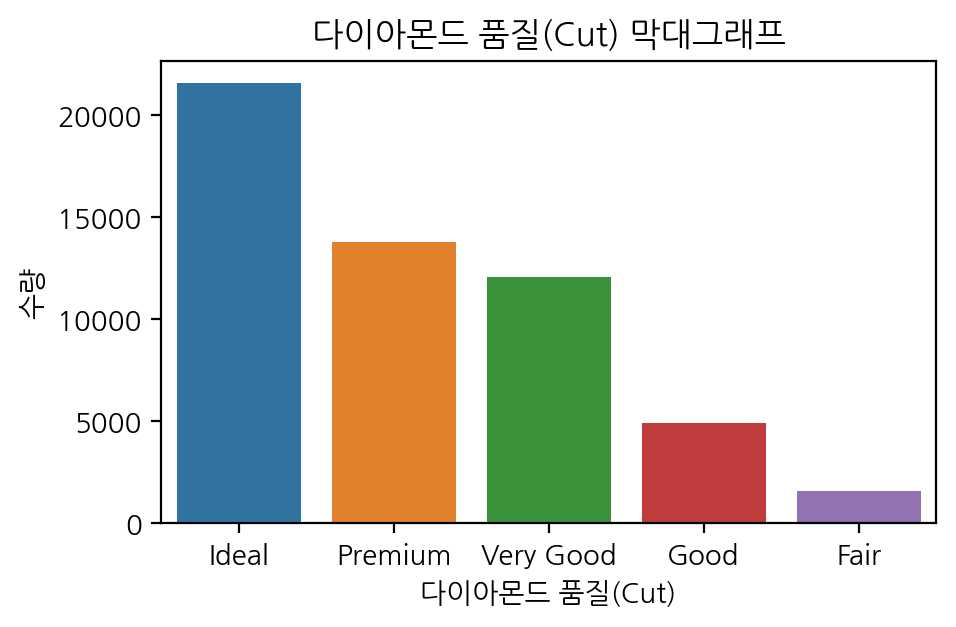

In [54]:
plt.rcParams.update({'figure.figsize' : [5, 3]})      # 그림 크기, 기본값 [6, 4]

sns.countplot(diamonds, x="cut", hue="cut")
plt.xlabel("다이아몬드 품질(Cut)")
plt.ylabel("수량")
plt.title('다이아몬드 품질(Cut) 막대그래프')
plt.show()

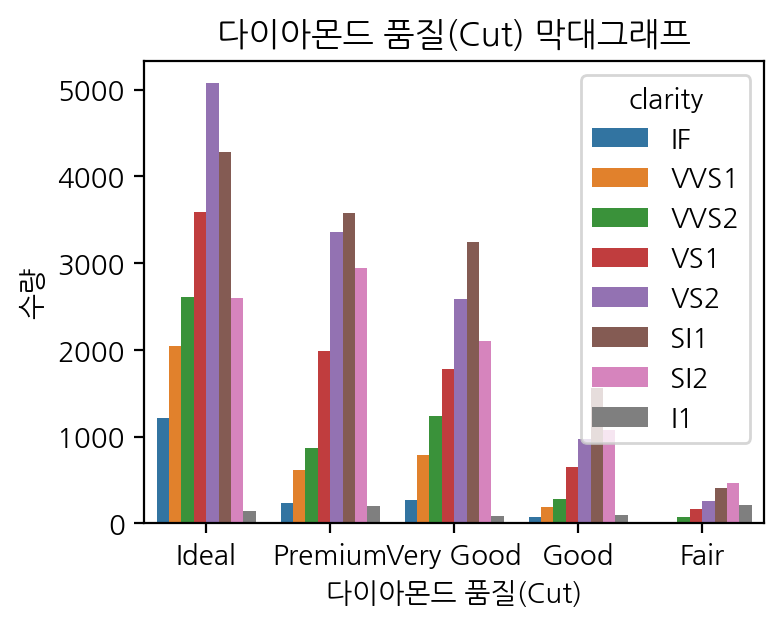

In [52]:
sns.countplot(diamonds, x="cut", hue="clarity")
plt.xlabel("다이아몬드 품질(Cut)")
plt.ylabel("수량")
plt.title('다이아몬드 품질(Cut) 막대그래프')
plt.show()

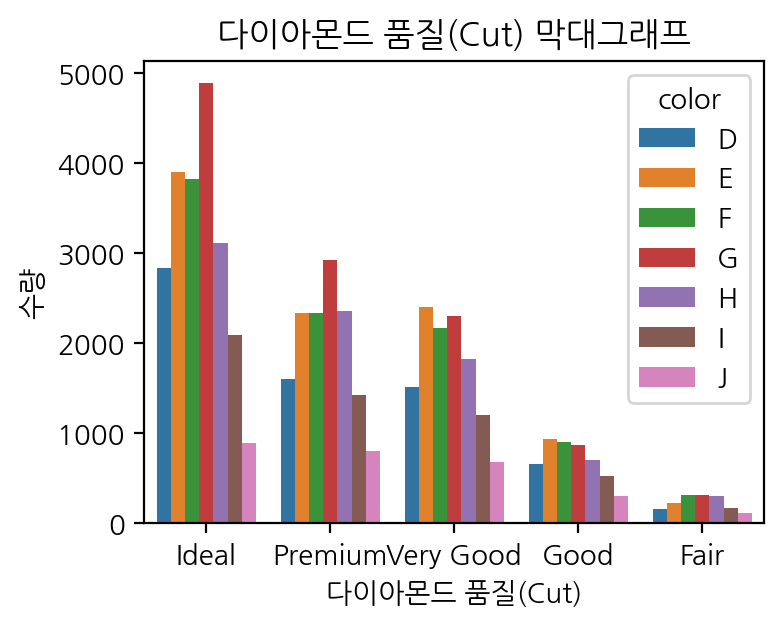

In [53]:
sns.countplot(diamonds, x="cut", hue="color")
plt.xlabel("다이아몬드 품질(Cut)")
plt.ylabel("수량")
plt.title('다이아몬드 품질(Cut) 막대그래프')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

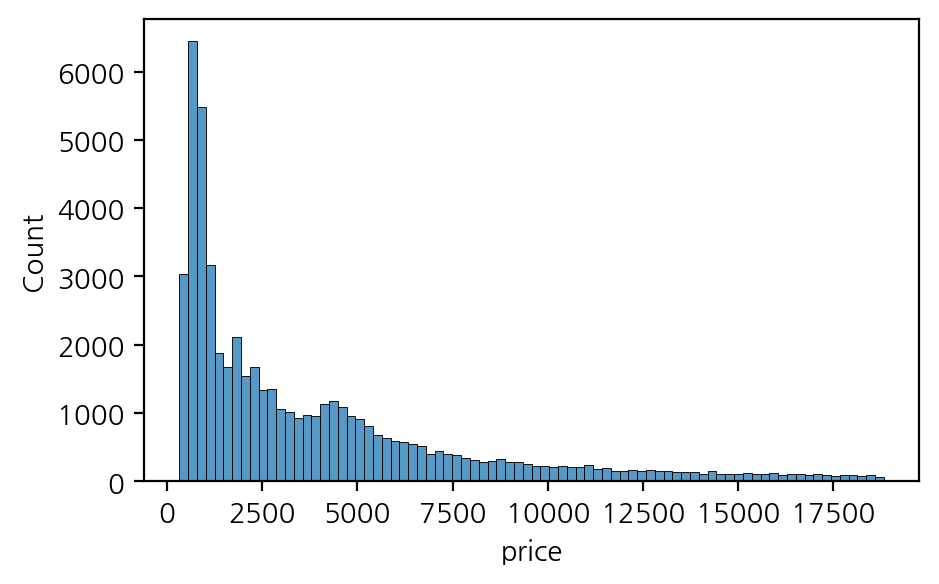

In [55]:
sns.histplot(diamonds, x ='price')

<Axes: xlabel='price', ylabel='Density'>

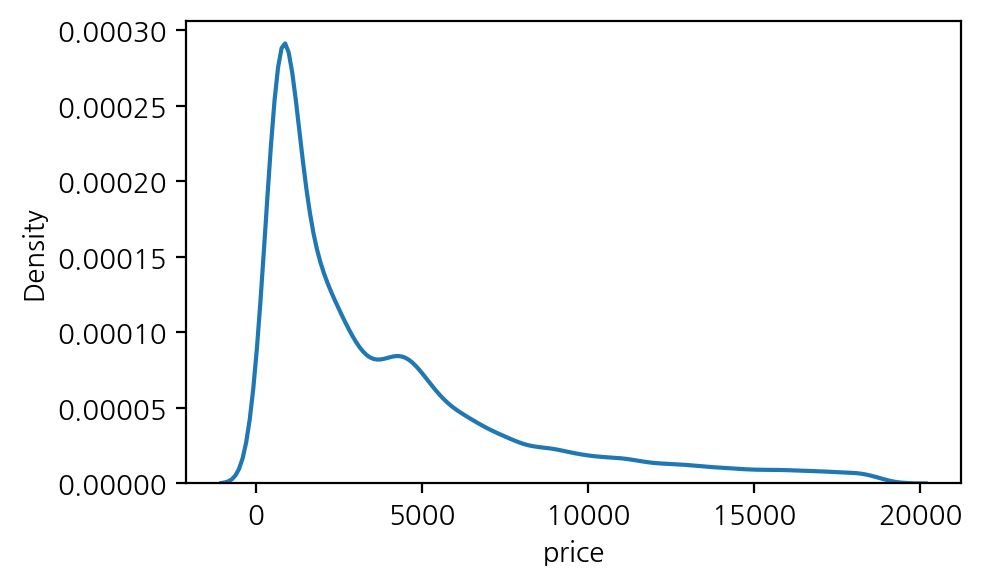

In [56]:
# kernal density estyimate plot , 커널 밀도 추청 분포 플롯
sns.kdeplot(diamonds, x = 'price')

<Axes: xlabel='price', ylabel='Count'>

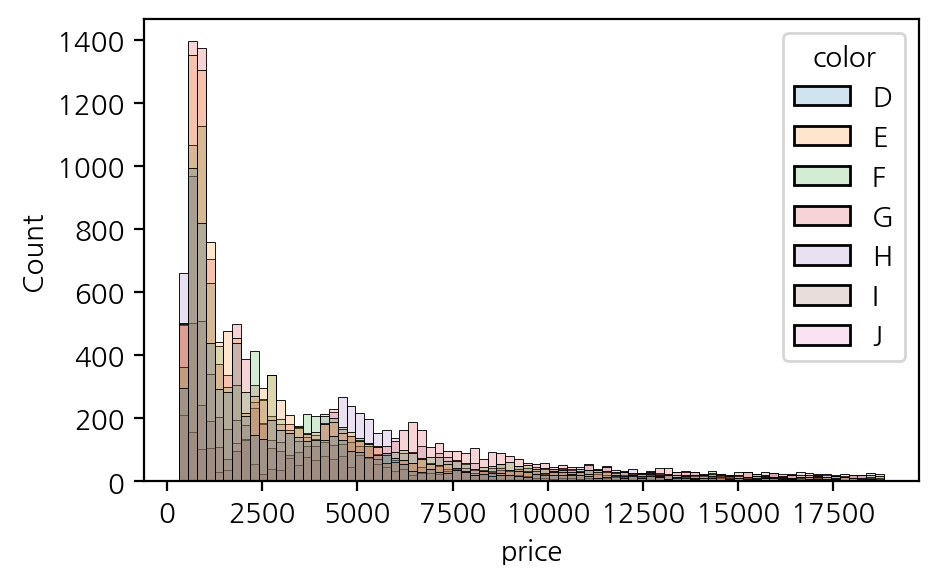

In [59]:
sns.histplot(diamonds, x = 'price', hue = 'color', alpha=.2)

<Axes: xlabel='price', ylabel='Density'>

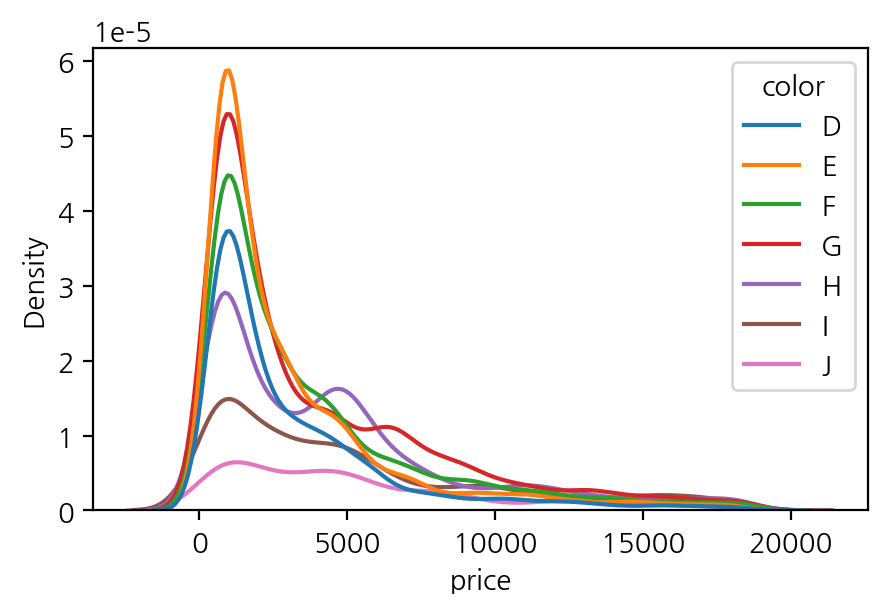

In [58]:
sns.kdeplot(diamonds, x = 'price', hue='color')

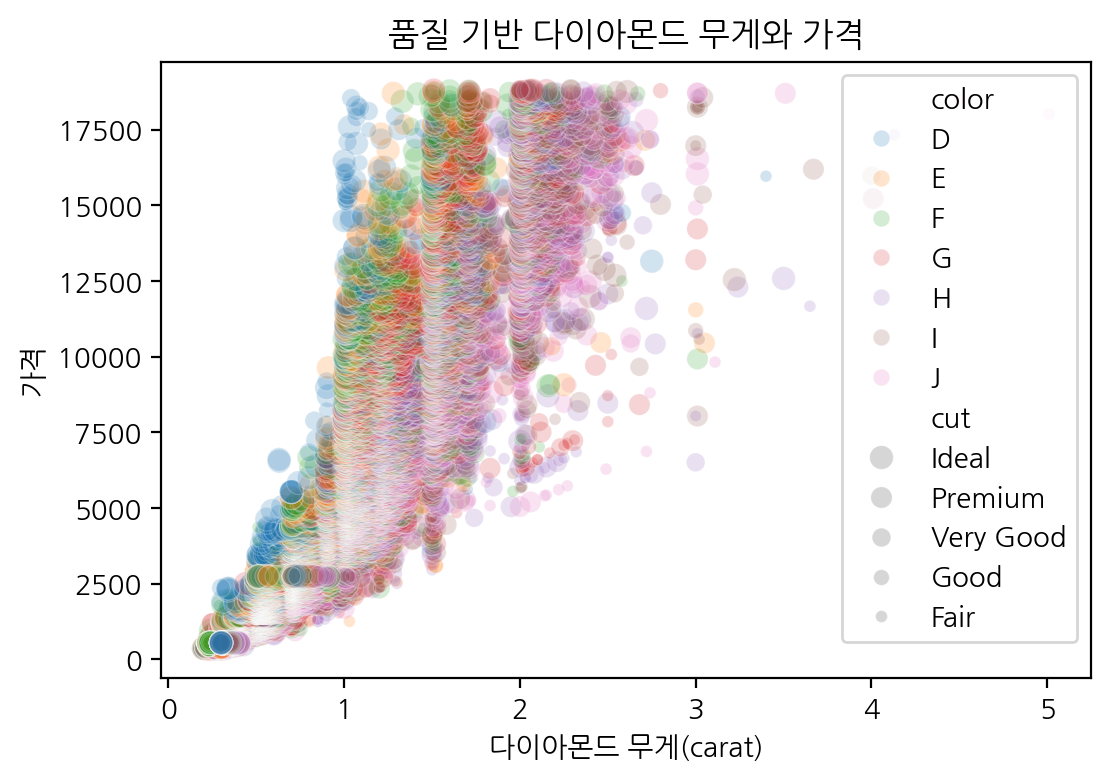

In [61]:
plt.rcParams.update({'figure.figsize' : [6, 4]})      # 그림 크기, 기본값 [6, 4]
sns.scatterplot(data=diamonds, x="carat", y="price", hue="color", size="cut",alpha=.2)
# sns.scatterplot(data=diamonds, x="carat", y="price", hue="cut", size="depth")
plt.xlabel("다이아몬드 무게(carat)")
plt.ylabel("가격")
plt.title('품질 기반 다이아몬드 무게와 가격');

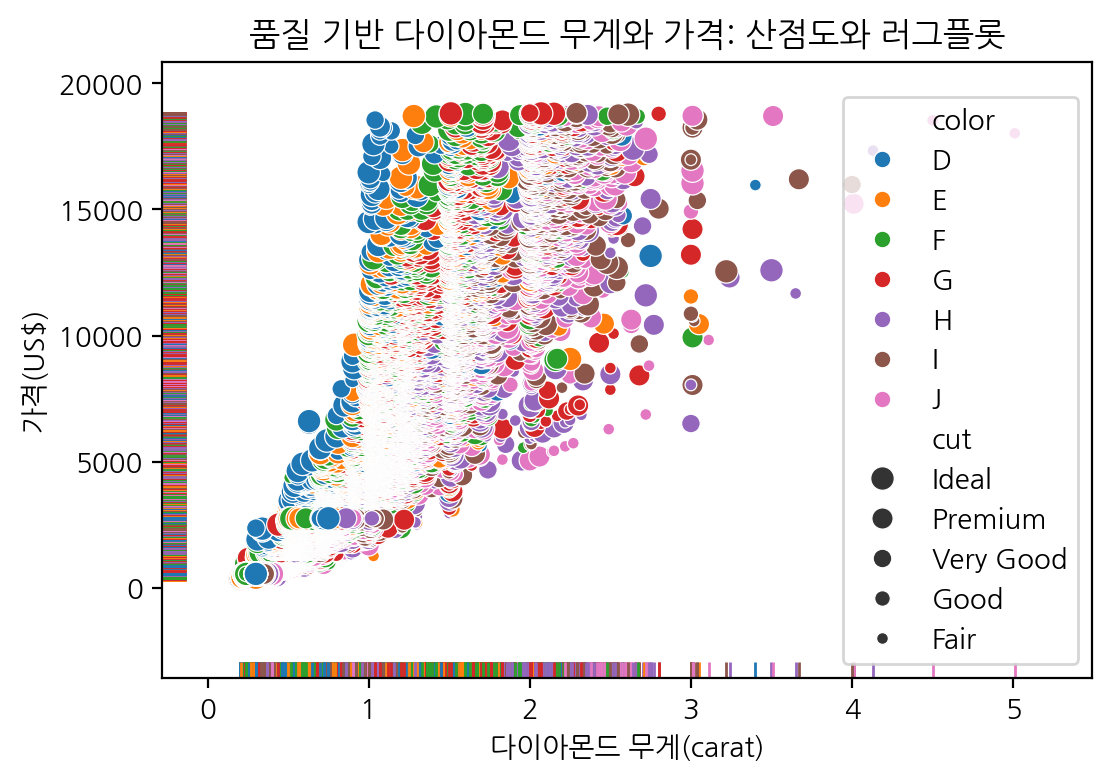

In [62]:
sns.scatterplot(data=diamonds, x="carat", y="price", hue="color", size="cut")
sns.rugplot(data=diamonds, x='carat', y='price', hue='color', )   # 러그플롯 추가
plt.legend(loc=4)
plt.xlabel("다이아몬드 무게(carat)")
plt.ylabel("가격(US$)")
plt.title('품질 기반 다이아몬드 무게와 가격: 산점도와 러그플롯');

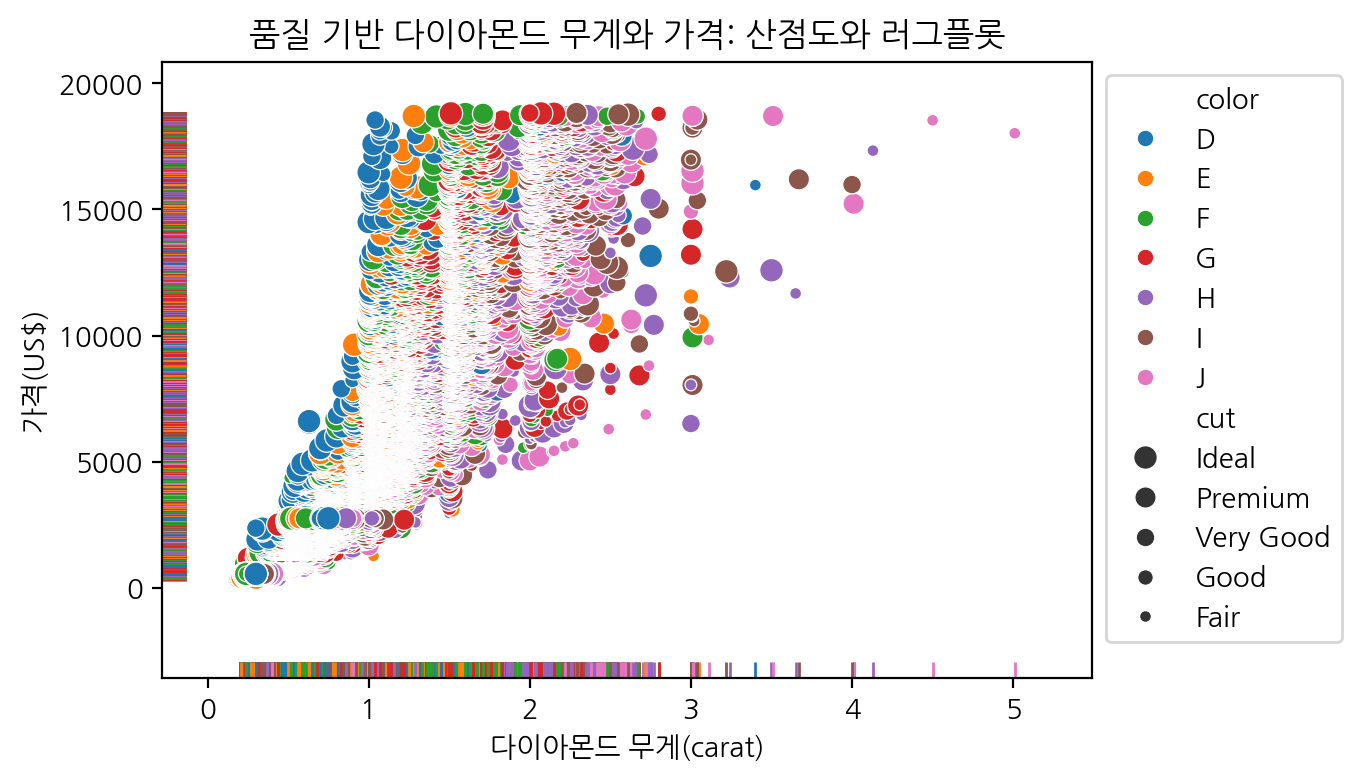

In [63]:
sns.scatterplot(data=diamonds, x="carat", y="price", hue="color", size="cut")
sns.rugplot(data=diamonds, x='carat', y='price', hue='color', )
plt.legend(bbox_to_anchor=(1, 1)) # 밖으로 빼기
plt.xlabel("다이아몬드 무게(carat)")
plt.ylabel("가격(US$)")
plt.title('품질 기반 다이아몬드 무게와 가격: 산점도와 러그플롯');

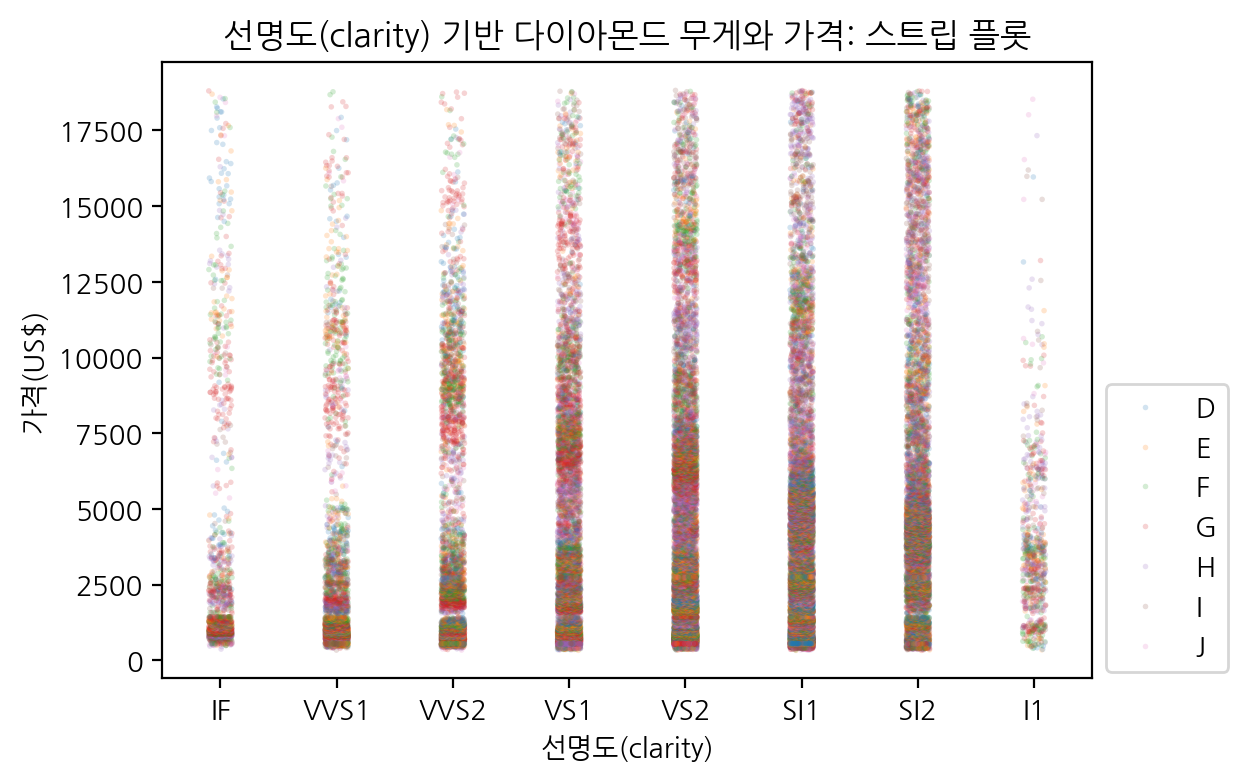

In [64]:
sns.stripplot(diamonds, x='clarity', y='price', hue="color", size=2, alpha=.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("선명도(clarity)")
plt.ylabel("가격(US$)")
plt.title('선명도(clarity) 기반 다이아몬드 무게와 가격: 스트립 플롯');

## ch12 인터렉티브 그래프

In [65]:
!pip show plotly

Name: plotly
Version: 5.15.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, datascience, geemap


In [66]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [69]:
# 산점도 만들기
import plotly.express as px
px.scatter(data_frame = mpg, x = 'cty', y = 'hwy', color = 'drv')

## 막대 그래프 만들기

In [70]:
df = mpg.groupby('category', as_index = False).agg(n=('category','count'))    # as_index = False 컬럼으로 올라옴 category
display_sbs(df, mpg.groupby('category').agg(n=('category','count')))

category 
 n 
 
 
 
 
 0 
 2seater 
 5 
 
 
 1 
 compact 
 47 
 
 
 2 
 midsize 
 41 
 
 
 3 
 minivan 
 11 
 
 
 4 
 pickup 
 33 
 
 
 5 
 subcompact 
 35 
 
 
 6 
 suv 
 62 
 
 
      
 
 
 
 n 
 
 
 category 
 
 
 
 
 
 2seater 
 5 
 
 
 compact 
 47 
 
 
 midsize 
 41 
 
 
 minivan 
 11 
 
 
 pickup 
 33 
 
 
 subcompact 
 35 
 
 
 suv 
 62

In [71]:
px.bar(data_frame = df, x = 'category', y = 'n', color = 'category')

In [72]:
px.histogram(mpg, x='category', color="category", barmode='group')

In [73]:
# economics 불러오기
economics = pd.read_csv('data/economics.csv')

# 선 그래프 만들기
px.line(data_frame = economics, x = 'date', y = 'psavert')

In [76]:
# 상자 그림 만들기
px.box(data_frame = mpg, x = 'drv', y = 'hwy', color = 'drv')

In [77]:
# 그래프 크기 조절
px.scatter(data_frame = mpg, x = 'hwy', y = 'cty', color = 'drv',
           width = 600, height = 400)

In [78]:
# 그래프를 변수에 할당하기
fig = px.scatter(data_frame = mpg, x = 'cty', y = 'hwy')

# html로 저장하기
# fig.write_html('scatter_plot.html', full_html = True, auto_play = True)
fig.write_html('scatter_plot.html')

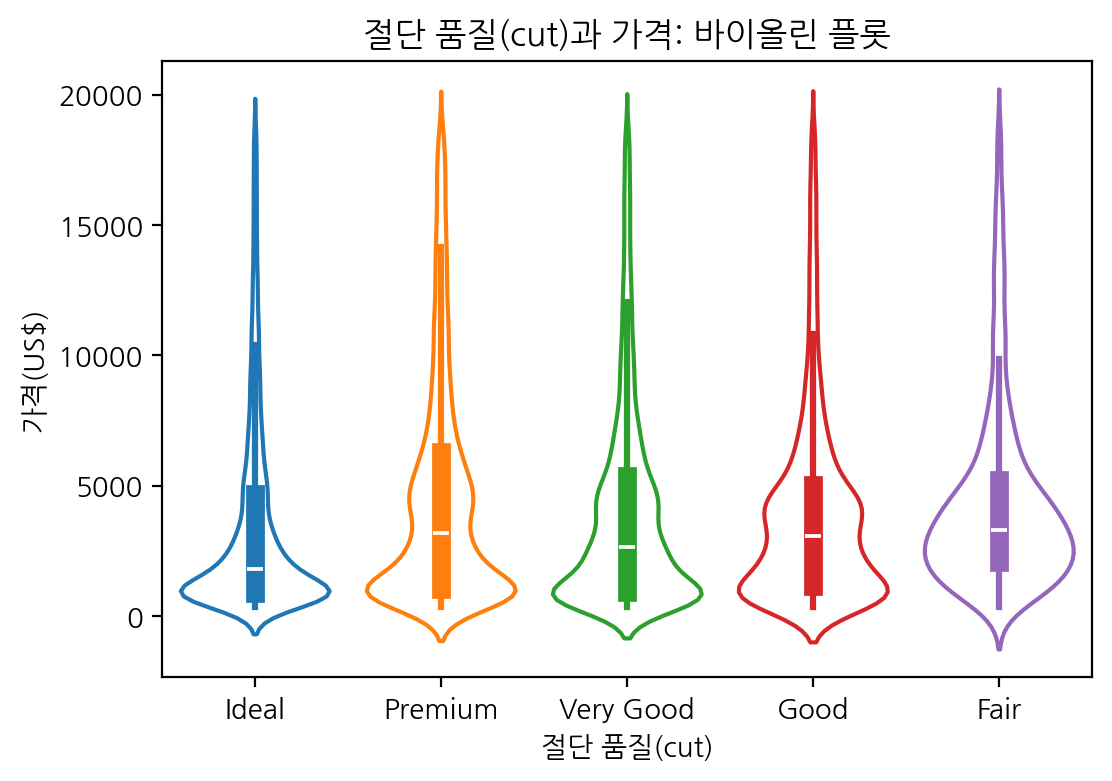

In [79]:
sns.violinplot(diamonds, x="cut", y="price", hue='cut', fill=False)
plt.xlabel("절단 품질(cut)")
plt.ylabel("가격(US$)")
plt.title('절단 품질(cut)과 가격: 바이올린 플롯');

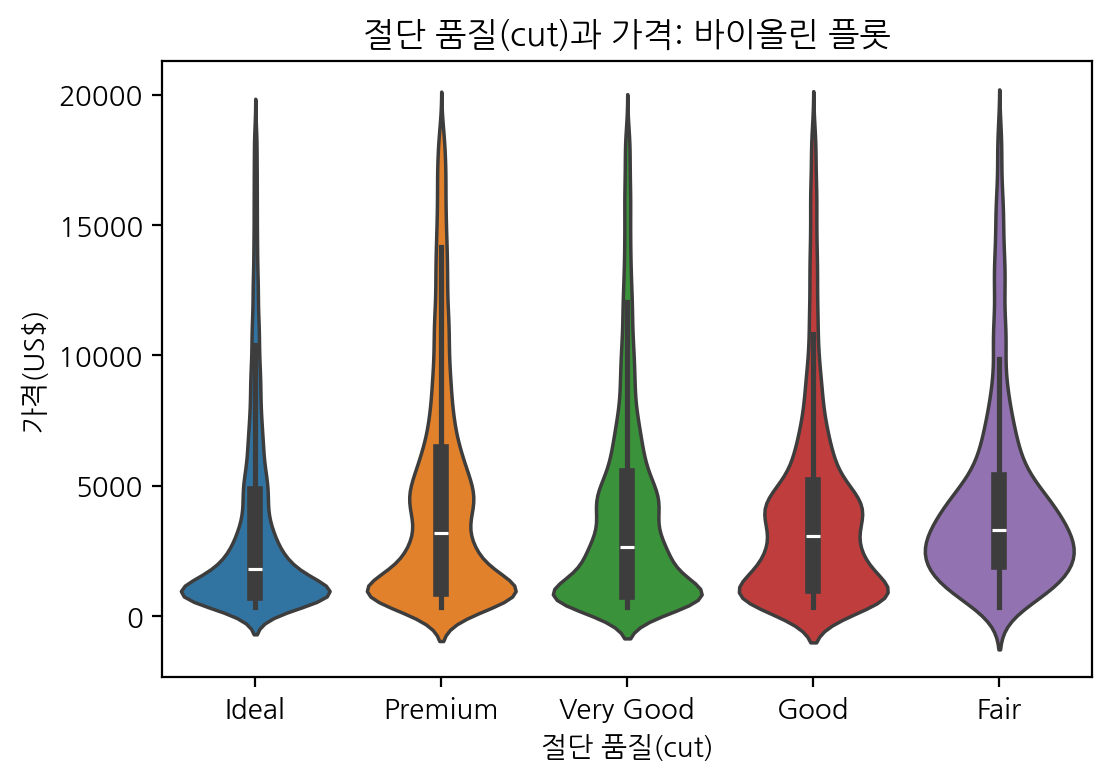

In [80]:
sns.violinplot(diamonds, x="cut", y="price", hue='cut')
plt.xlabel("절단 품질(cut)")
plt.ylabel("가격(US$)")
plt.title('절단 품질(cut)과 가격: 바이올린 플롯');

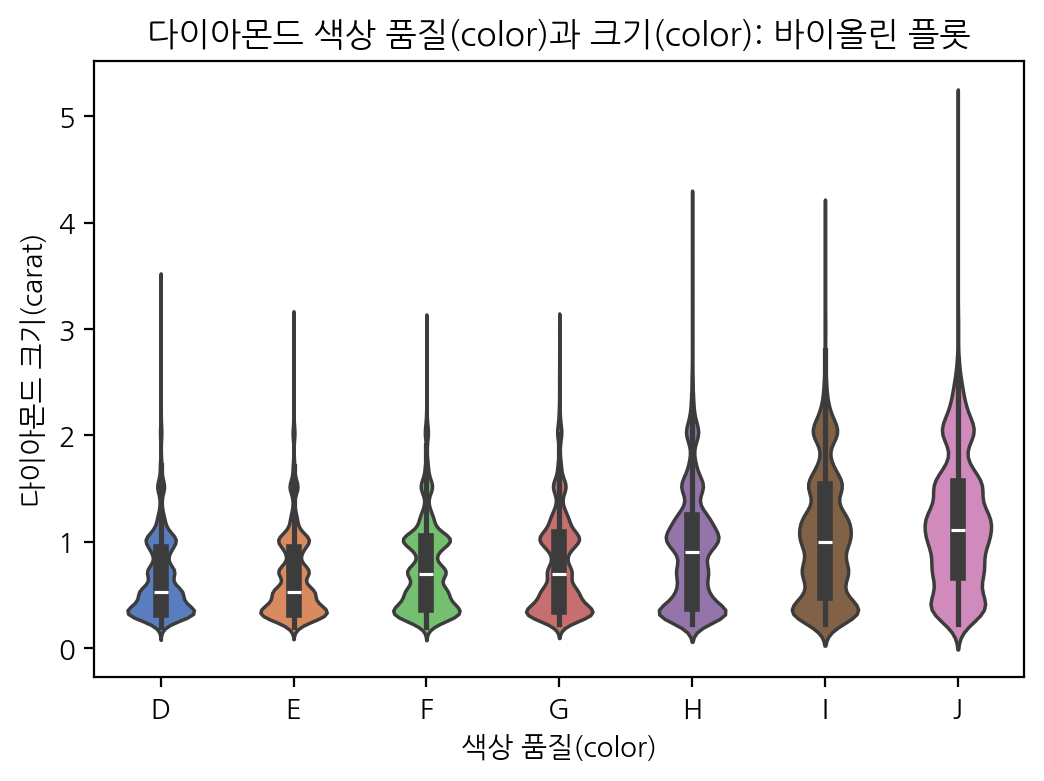

In [81]:
sns.violinplot(diamonds, x='color', y='carat', hue='color', palette='muted', color='royalblue', width=.5)
plt.xlabel("색상 품질(color)")
plt.ylabel("다이아몬드 크기(carat)")
plt.title('다이아몬드 색상 품질(color)과 크기(color): 바이올린 플롯');

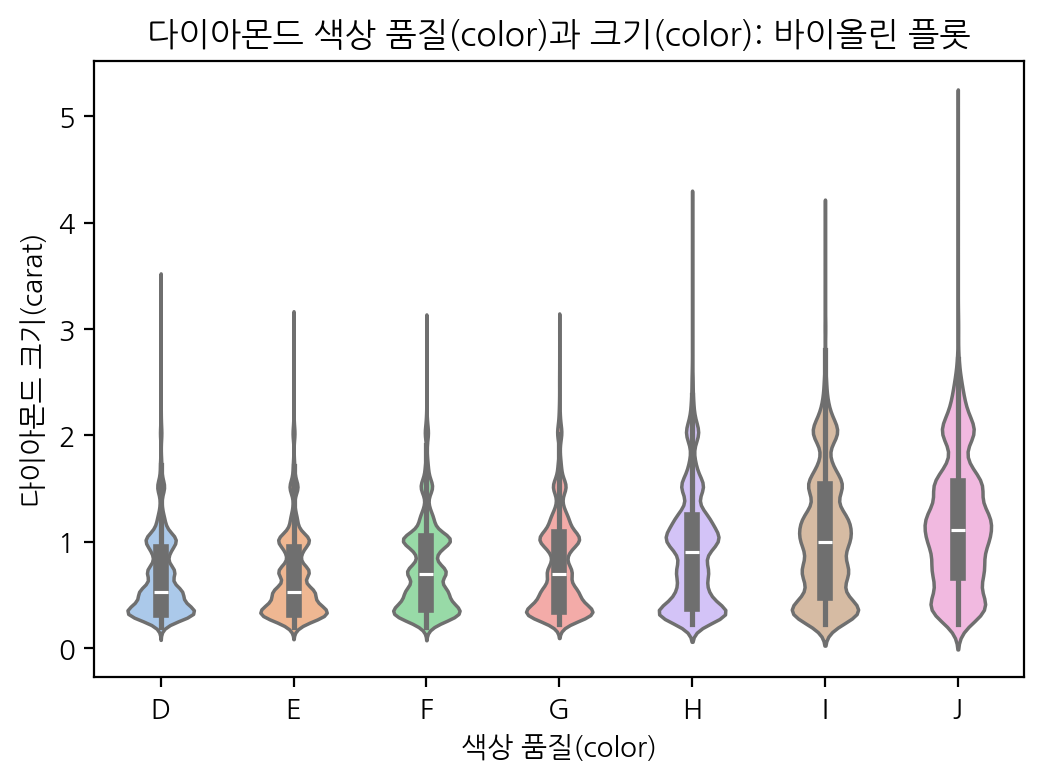

In [82]:
sns.violinplot(diamonds, x='color', y='carat', hue='color', palette='pastel', color='royalblue', width=.5)
plt.xlabel("색상 품질(color)")
plt.ylabel("다이아몬드 크기(carat)")
plt.title('다이아몬드 색상 품질(color)과 크기(color): 바이올린 플롯');

Text(0.5, 1.0, '절단 품질(cut)과 가격: 바이올린 플롯')

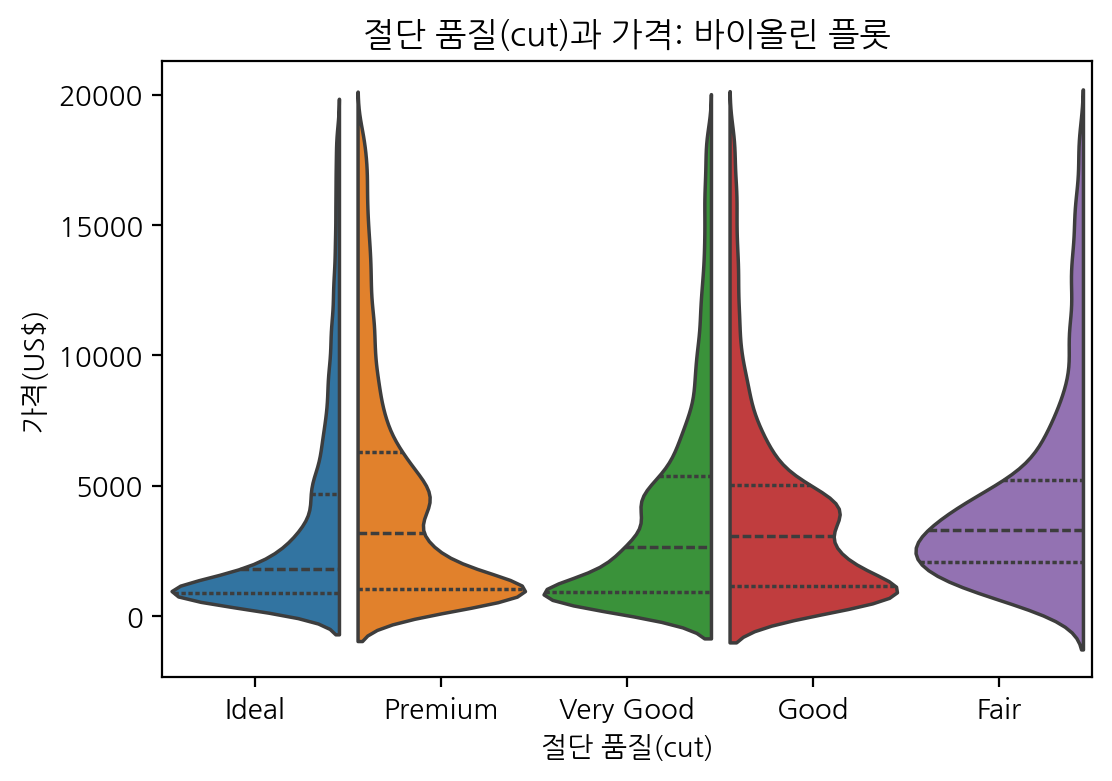

In [83]:
sns.violinplot(diamonds, x='cut', y='price', hue='cut', split=True,
               gap=.1, inner='quartile', width=1)   # split 반쪽, gap 간격사이 거리,
plt.xlabel("절단 품질(cut)")
plt.ylabel("가격(US$)")
plt.title('절단 품질(cut)과 가격: 바이올린 플롯')


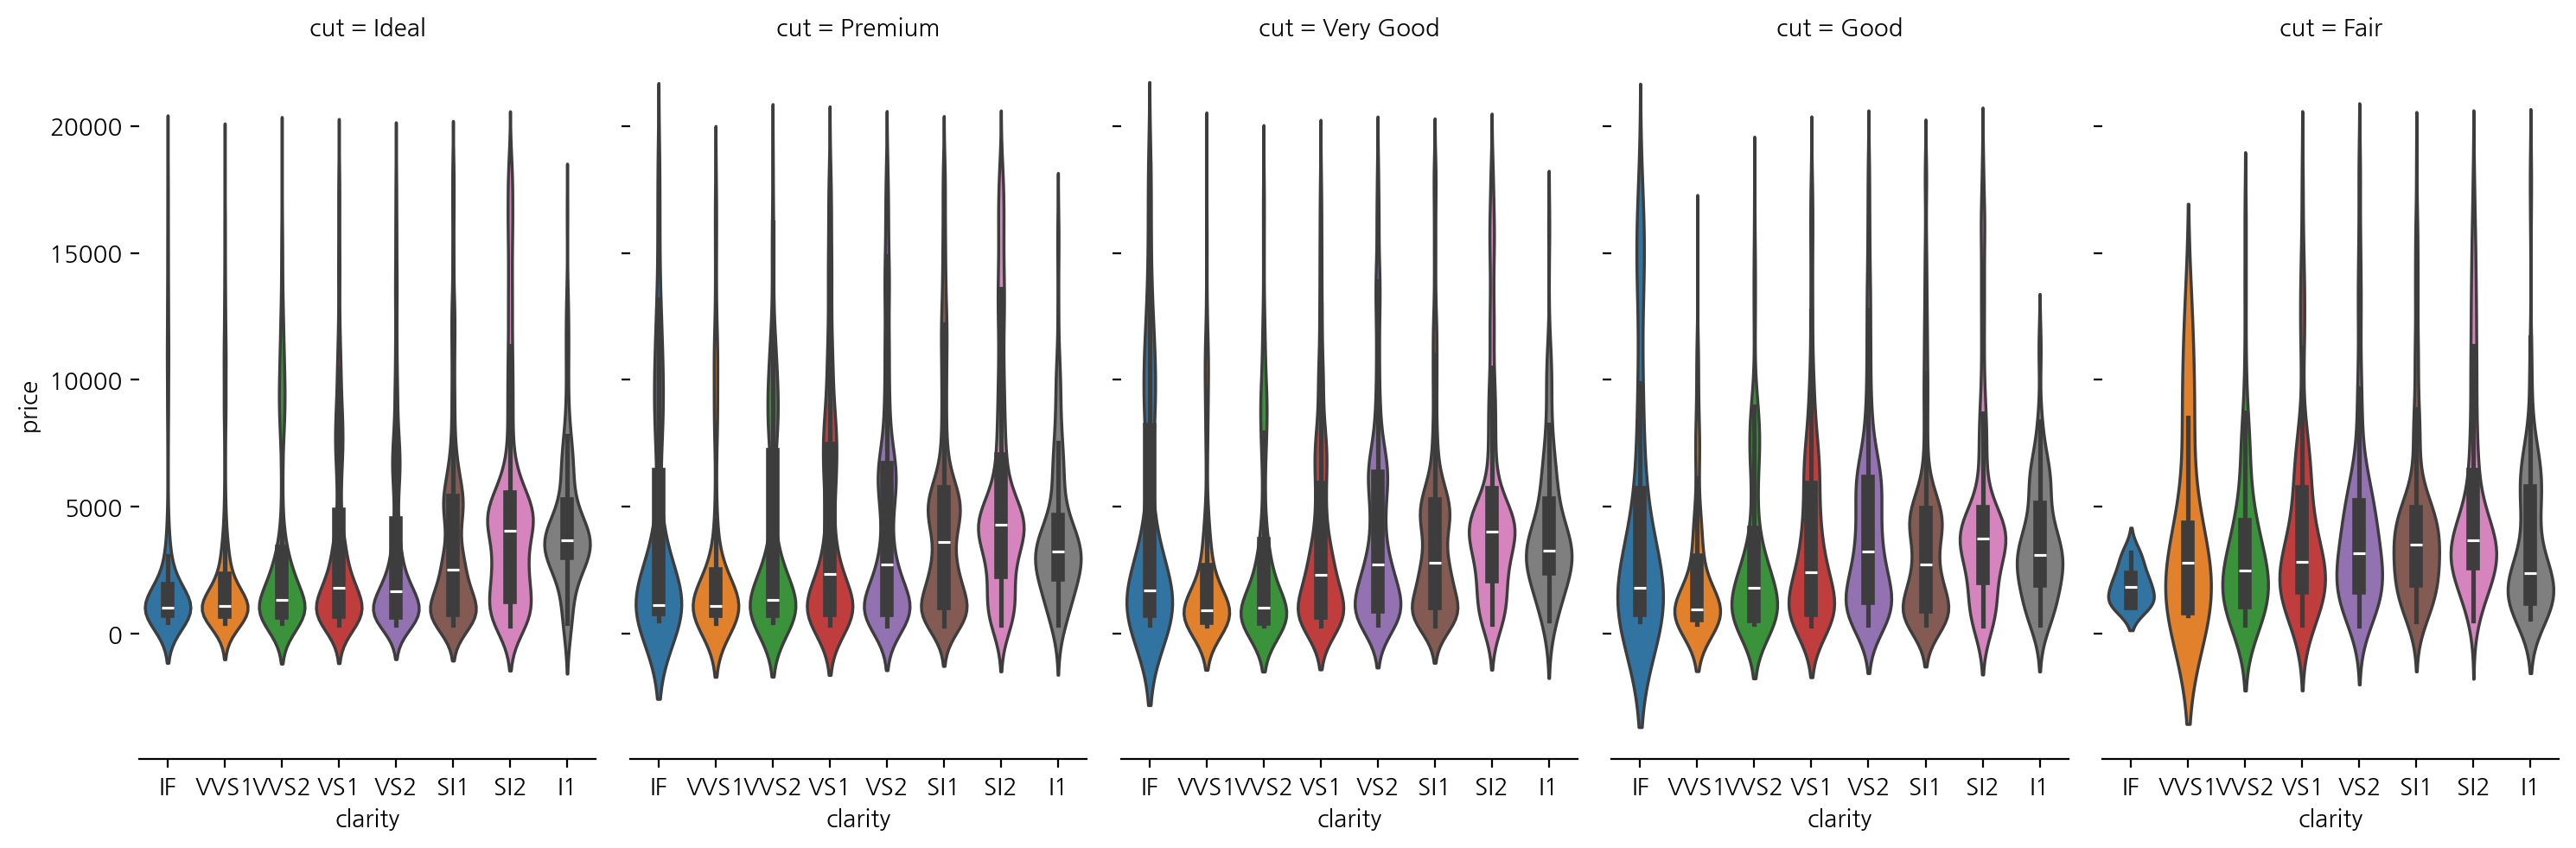

In [84]:
g = sns.catplot(
    data=diamonds, kind="violin",
    x="clarity", y="price", hue="clarity", col='cut', aspect=.6
)
g.despine(left=True);


## ch13 데이터분석 보고서: 마크다운

문자 앞뒤에 *특수문자*를 넣으면 기울임체가 됩니다.

문자 앞뒤에 **특수문자**를 넣으면 강조체가 됩니다.

문자 앞뒤에 ~~특수문자~~를 넣으면 취소선을 만듭니다.

문자 앞뒤에 [특수문자](http://www.google.com/search?q=special+character)를 넣으면 하이퍼링크를 만듭니다.

# 1 단계 제목
## 2 단계 제목
### 3 단계 제목
#### 4 단계 제목

코드에 백틱 기호를 입력하면 `pandas`와 같이 음영을 넣습니다.

## 마크다운 공식문서

- [mark-down](https://www.markdownguide.org/)

# 명령 프롬프트에서 실행
> pandoc report.ipynb -s -o report.docx

( or ``` )